In [104]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [105]:
# db接続
db_name = "orders.db"
table_name = "all_order"
conn = sqlite3.connect(db_name)
c = conn.cursor()

In [124]:
# all_orderでchese が tureのものを数える
c.execute("SELECT COUNT(qty) FROM all_order WHERE cheese = 'ture'")

# データを取得
data = c.fetchall()
print(data)

[(104,)]


In [106]:
orders_food = ["ポテト","唐揚げ","揚げたこ焼き"]
orders_drink = ["ソーダ","コーラ","ファンタグレープ","緑茶","麦茶","ファンタオレンジ","水"]
options = ["cheese","mayo","sauce","ketchup","salt"]

| id | time | item | qty | cheese | mayo | source | ketchup | salt |
| - | - | - | - | - | - | - | - | - |
| 1 | 2023-10-07 10:35:44.198000 | 唐揚げ | 1 | false | false | false | false | false |
| 2 | 2023-10-07 10:38:08.659000 | 唐揚げ | 2 | false | false | false | false | false |
| 3 | 2023-10-07 10:40:13.421000 | 揚げたこ焼き | 1 | false | false | false | false | false |

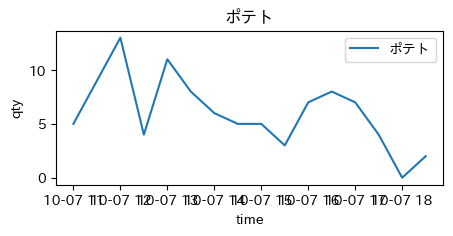

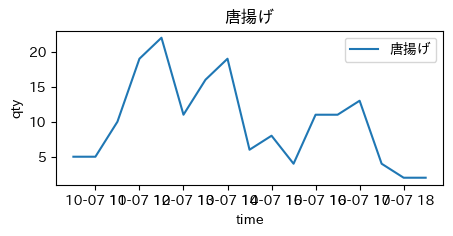

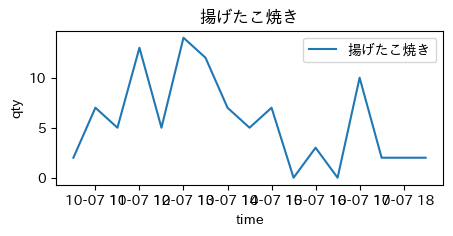

In [107]:
# order ごとのデータを取得,棒グラフにする
for order in orders_food:
    sql = "select * from seven where item = '{}'".format(order)
    df = pd.read_sql(sql, conn)
    # time を datetime型に変換
    df['time'] = pd.to_datetime(df['time'])
    # 30分ごとに qty を集計
    df = df.resample('30T', on='time').sum()
    # 0 を補完
    df = df.reindex(pd.date_range(df.index[0], df.index[-1], freq='30T'), fill_value=0)
    # plot
    plt.figure(figsize=(5,2))
    plt.plot(df.index, df['qty'], label=order)
    plt.title(order)
    plt.xlabel('time')
    plt.ylabel('qty')
    plt.legend()
    plt.show()

In [108]:
# order ごとのデータを取得
for order in orders_food:
    sql = "select * from seven where item = '{}'".format(order)
    df = pd.read_sql(sql, conn)
    # time を datetime型に変換
    df['time'] = pd.to_datetime(df['time'])
    # 30分ごとに qty を集計
    df = df.resample('30T', on='time').sum()
    # 0 を補完
    df = df.reindex(pd.date_range(df.index[0], df.index[-1], freq='30T'), fill_value=0)
    globals()["df_seven_" + order] = df

for order in orders_drink:
    sql = "select * from seven where item = '{}'".format(order)
    df = pd.read_sql(sql, conn)
    # time を datetime型に変換
    df['time'] = pd.to_datetime(df['time'])
    # 30分ごとに qty を集計
    df = df.resample('30T', on='time').sum()
    # 0 を補完
    df = df.reindex(pd.date_range(df.index[0], df.index[-1], freq='30T'), fill_value=0)
    globals()["df_seven_" + order] = df

In [109]:
# order ごとのデータを取得
for order in orders_food:
    sql = "select * from eight where item = '{}'".format(order)
    df = pd.read_sql(sql, conn)
    # time を datetime型に変換
    df['time'] = pd.to_datetime(df['time'])
    # 30分ごとに qty を集計
    df = df.resample('30T', on='time').sum()
    # 0 を補完
    df = df.reindex(pd.date_range(df.index[0], df.index[-1], freq='30T'), fill_value=0)
    globals()["df_eight_" + order] = df

for order in orders_drink:
    sql = "select * from eight where item = '{}'".format(order)
    df = pd.read_sql(sql, conn)
    # time を datetime型に変換
    df['time'] = pd.to_datetime(df['time'])
    # 30分ごとに qty を集計
    df = df.resample('30T', on='time').sum()
    # 0 を補完
    df = df.reindex(pd.date_range(df.index[0], df.index[-1], freq='30T'), fill_value=0)
    globals()["df_eight_" + order] = df

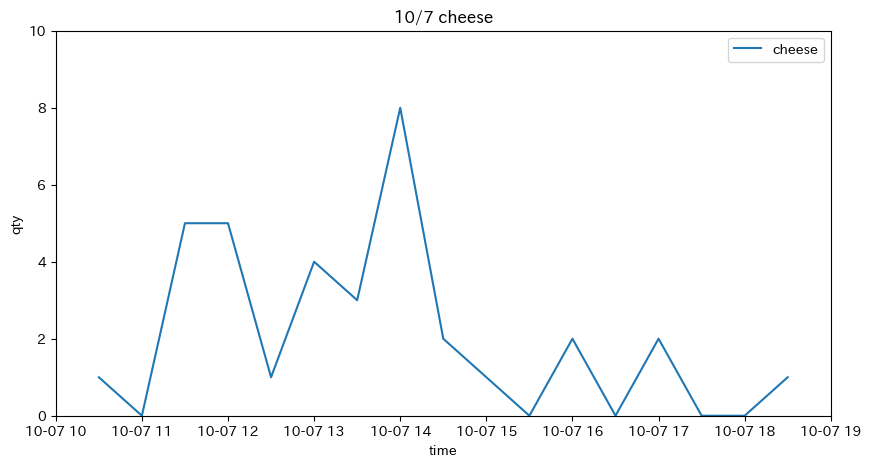

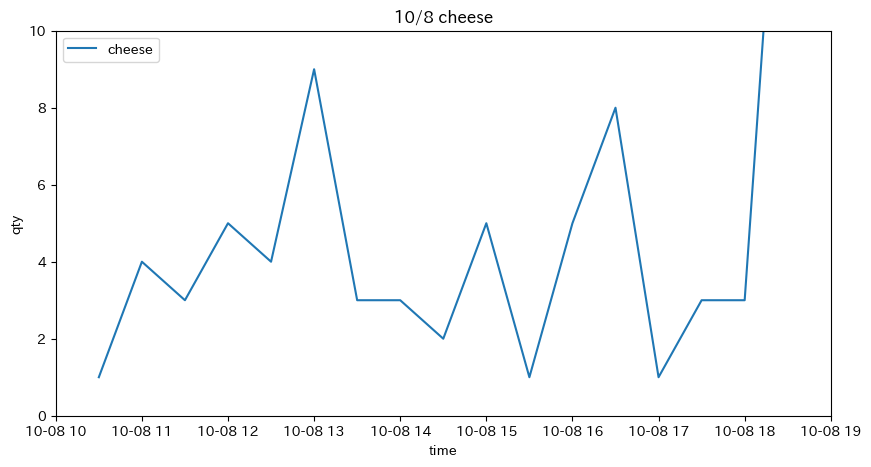

In [122]:
# chese のデータを取得、グラフとして表示
# chese が ture のデータを取得
sql = "select time , qty from seven where cheese = 'ture'"
df = pd.read_sql(sql, conn)
# time を datetime型に変換
df['time'] = pd.to_datetime(df['time'])
# 30分ごとに qty を集計
df = df.resample('30T', on='time').sum()
# 0 を補完
df = df.reindex(pd.date_range(df.index[0], df.index[-1], freq='30T'), fill_value=0)
# plot
plt.figure(figsize=(10,5))
plt.plot(df.index, df['qty'], label="cheese")
plt.title("10/7 cheese")
plt.xlabel('time')
plt.ylabel('qty')
plt.ylim(0, 10)
plt.xlim(pd.to_datetime("2023-10-07 10:00:00"), pd.to_datetime("2023-10-07 19:00:00"))
plt.legend()
plt.show()

# chese のデータを取得、グラフとして表示
# chese が ture のデータを取得
sql = "select time , qty from eight where cheese = 'ture'"
df = pd.read_sql(sql, conn)
# time を datetime型に変換
df['time'] = pd.to_datetime(df['time'])
# 30分ごとに qty を集計
df = df.resample('30T', on='time').sum()
# 0 を補完
df = df.reindex(pd.date_range(df.index[0], df.index[-1], freq='30T'), fill_value=0)
# plot
plt.figure(figsize=(10,5))
plt.plot(df.index, df['qty'], label="cheese")
plt.title("10/8 cheese")
plt.xlabel('time')
plt.ylabel('qty')
plt.ylim(0, 10)
plt.xlim(pd.to_datetime("2023-10-08 10:00:00"), pd.to_datetime("2023-10-08 19:00:00"))
plt.legend()
plt.show()

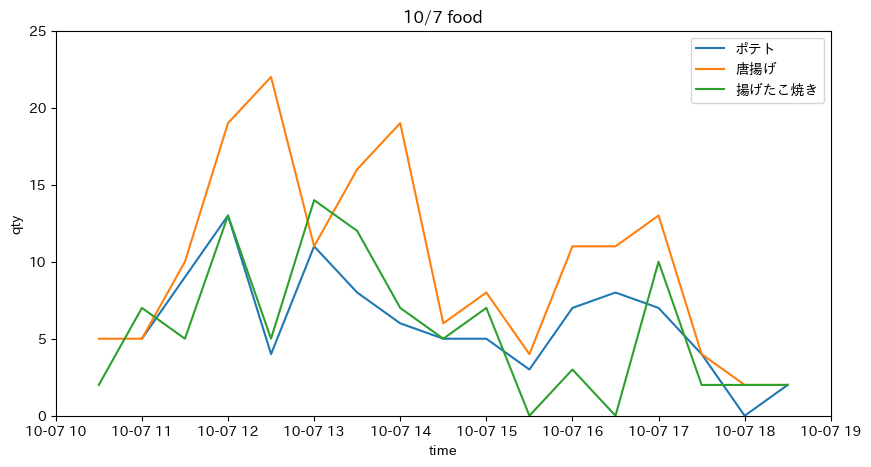

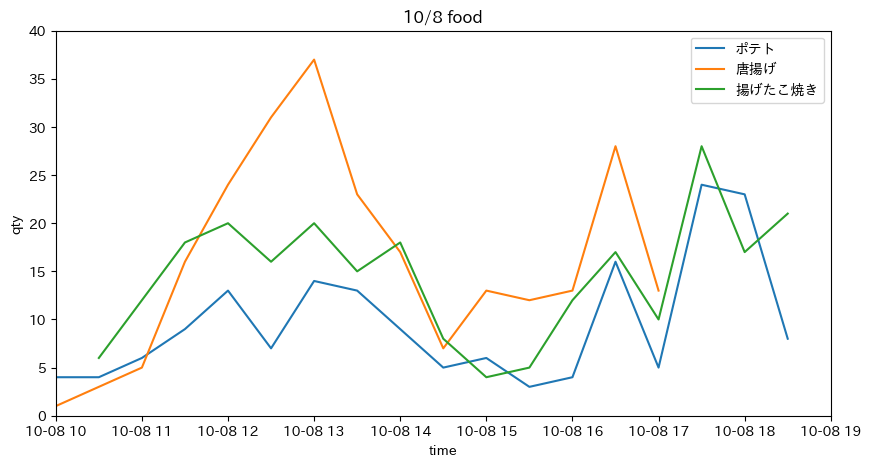

In [126]:
# 一つのグラフにプロット
plt.figure(figsize=(10,5))
for order in orders_food:
    plt.plot(globals()["df_seven_" + order].index, globals()["df_seven_" + order]['qty'], label=order)
plt.title("10/7 food")
plt.xlabel('time')
plt.ylabel('qty')
# 最大値を設定
plt.ylim(0, 25)
plt.xlim(pd.to_datetime("2023-10-07 10:00:00"), pd.to_datetime("2023-10-07 19:00:00"))
plt.legend()
plt.show()

# 一つのグラフにプロット
plt.figure(figsize=(10,5))
for order in orders_food:
    plt.plot(globals()["df_eight_" + order].index, globals()["df_eight_" + order]['qty'], label=order)
plt.title("10/8 food")
plt.xlabel('time')
plt.ylabel('qty')
# 最大値を設定
plt.ylim(0, 40)
plt.xlim(pd.to_datetime("2023-10-08 10:00:00"), pd.to_datetime("2023-10-08 19:00:00"))
plt.legend()
plt.show()

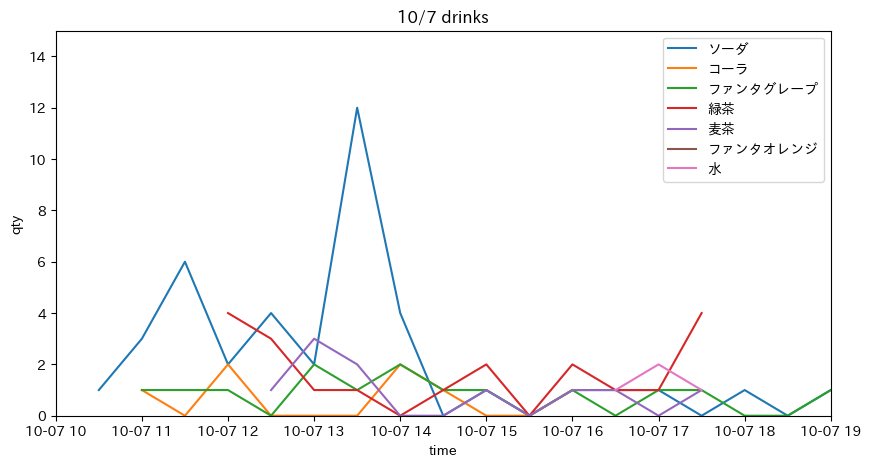

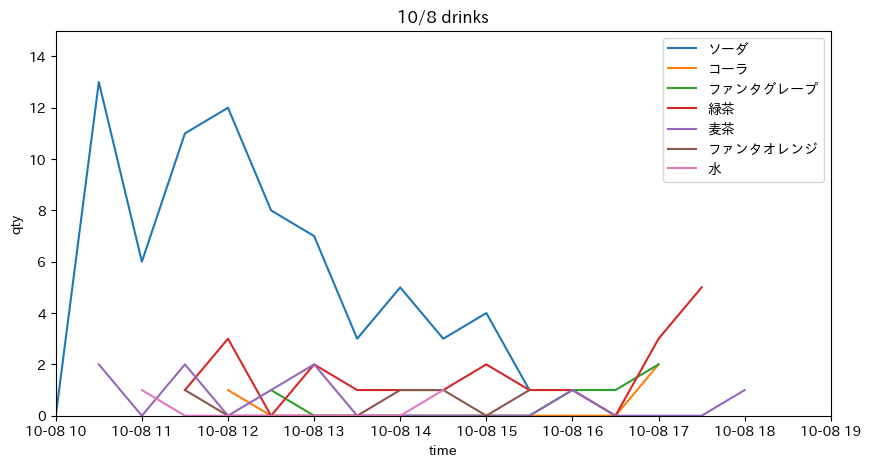

In [111]:
# 一つのグラフにプロット
plt.figure(figsize=(10,5))
for order in orders_drink:
    plt.plot(globals()["df_seven_" + order].index, globals()["df_seven_" + order]['qty'], label=order)
plt.title("10/7 drinks")
plt.xlabel('time')
plt.ylabel('qty')
# 最大値を設定
plt.ylim(0, 15)
plt.xlim(pd.to_datetime("2023-10-07 10:00:00"), pd.to_datetime("2023-10-07 19:00:00"))
plt.legend()
plt.show()

# 一つのグラフにプロット
plt.figure(figsize=(10,5))
for order in orders_drink:
    plt.plot(globals()["df_eight_" + order].index, globals()["df_eight_" + order]['qty'], label=order)
plt.title("10/8 drinks")
plt.xlabel('time')
plt.ylabel('qty')
# 最大値を設定
plt.ylim(0, 15)
plt.xlim(pd.to_datetime("2023-10-08 10:00:00"), pd.to_datetime("2023-10-08 19:00:00"))
plt.legend()
plt.show()


In [112]:
# 一つのグラフにプロット
for order in orders_food:
    globals()["df_seven_date_pass_" + order] = pd.DataFrame(globals()["df_seven_" + order]['qty'].values, columns=['qty'])
    globals()["df_seven_date_pass_" + order].index = pd.date_range(start='2023-10-07', periods=len(globals()["df_seven_date_pass_" + order]), freq='30T')
    globals()["df_eight_date_pass_" + order] = pd.DataFrame(globals()["df_eight_" + order]['qty'].values, columns=['qty'])
    globals()["df_eight_date_pass_" + order].index = pd.date_range(start='2023-10-08', periods=len(globals()["df_eight_date_pass_" + order]), freq='30T')
    # globals()["df_eight_date_pass" + order] を１日分ずらす
    globals()["df_eight_date_pass_" + order].index = globals()["df_eight_date_pass_" + order].index + pd.DateOffset(days=-1)

In [113]:
# 一つのグラフにプロット
for order in orders_drink:
    globals()["df_seven_date_pass_" + order] = pd.DataFrame(globals()["df_seven_" + order]['qty'].values, columns=['qty'])
    globals()["df_seven_date_pass_" + order].index = pd.date_range(start='2023-10-07', periods=len(globals()["df_seven_date_pass_" + order]), freq='30T')
    globals()["df_eight_date_pass_" + order] = pd.DataFrame(globals()["df_eight_" + order]['qty'].values, columns=['qty'])
    globals()["df_eight_date_pass_" + order].index = pd.date_range(start='2023-10-08', periods=len(globals()["df_eight_date_pass_" + order]), freq='30T')
    # globals()["df_eight_date_pass" + order] を１日分ずらす
    globals()["df_eight_date_pass_" + order].index = globals()["df_eight_date_pass_" + order].index + pd.DateOffset(days=-1)

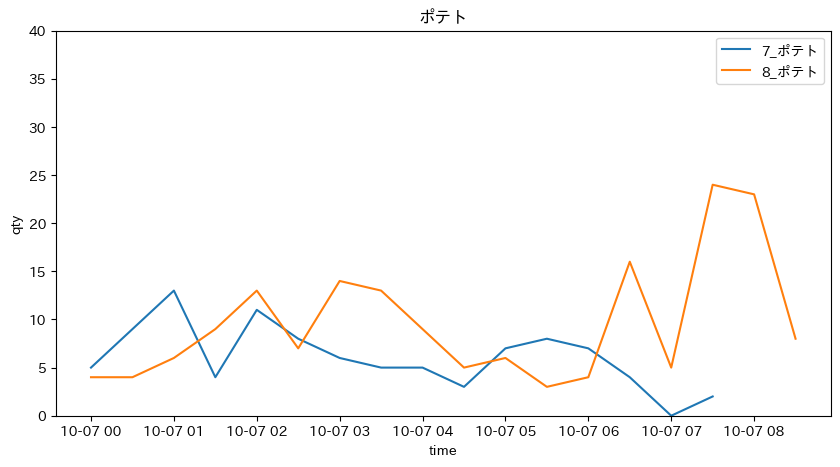

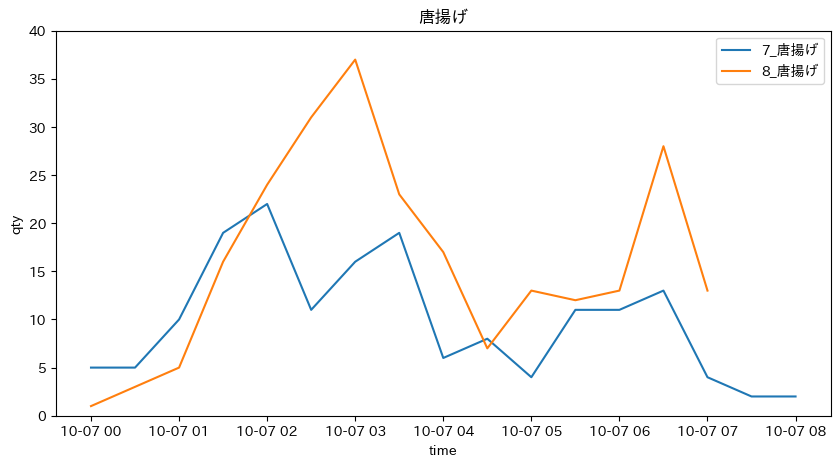

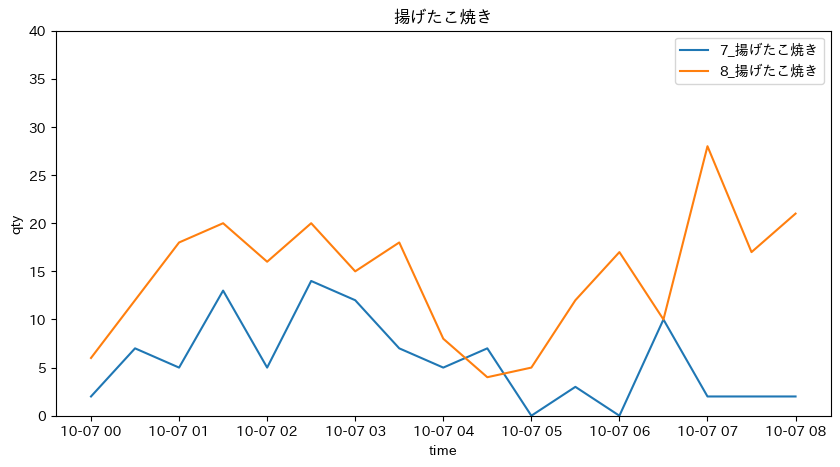

In [114]:
for order in orders_food:
    plt.figure(figsize=(10,5))
    plt.plot(globals()["df_seven_date_pass_" + order].index, globals()["df_seven_date_pass_" + order]['qty'], label="7_"+order)
    plt.plot(globals()["df_eight_date_pass_" + order].index, globals()["df_eight_date_pass_" + order]['qty'], label="8_"+order)
    plt.title(order)
    plt.xlabel('time')
    plt.ylabel('qty')
    # 最大値を設定
    plt.ylim(0, 40)
    # plt.xlim(pd.to_datetime("2023-10-07 10:00:00"), pd.to_datetime("2023-10-07 19:00:00"))
    plt.legend()
    plt.show()

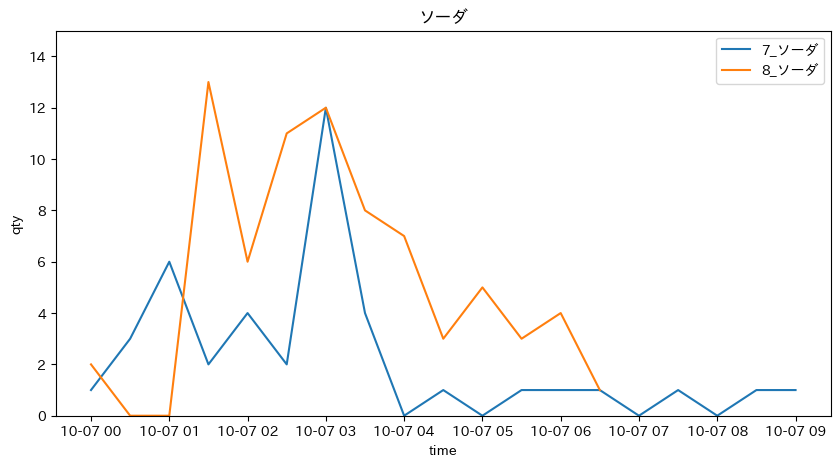

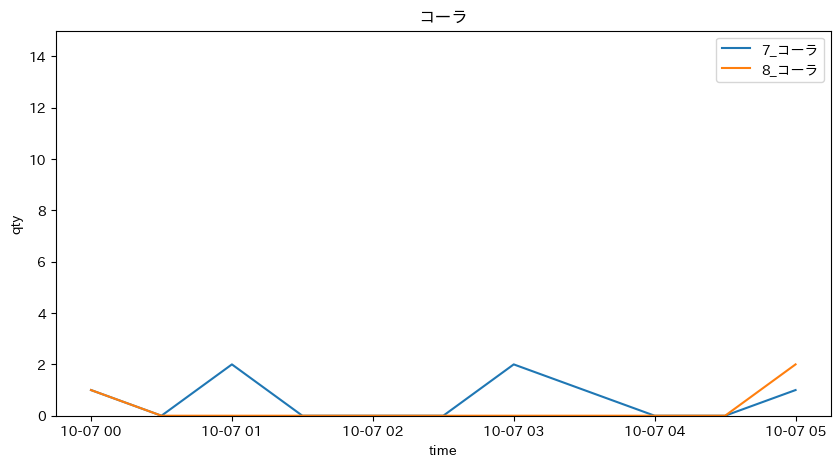

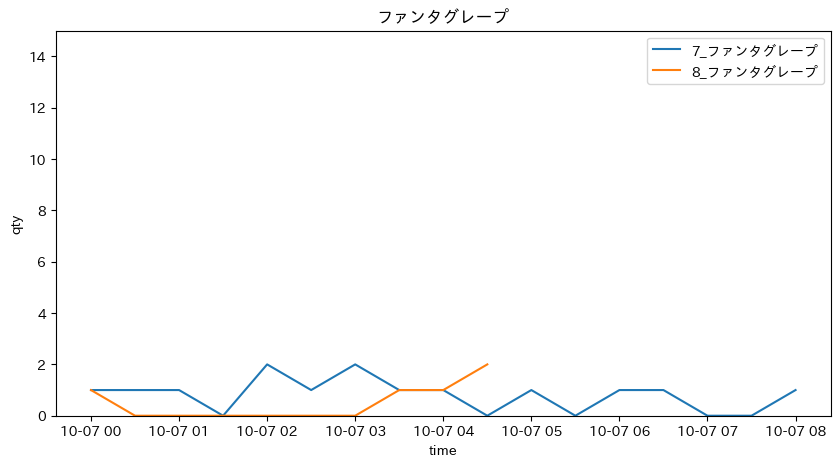

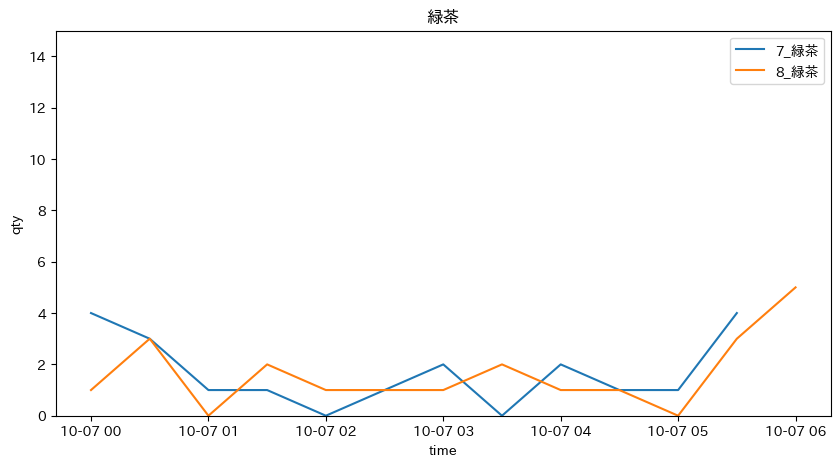

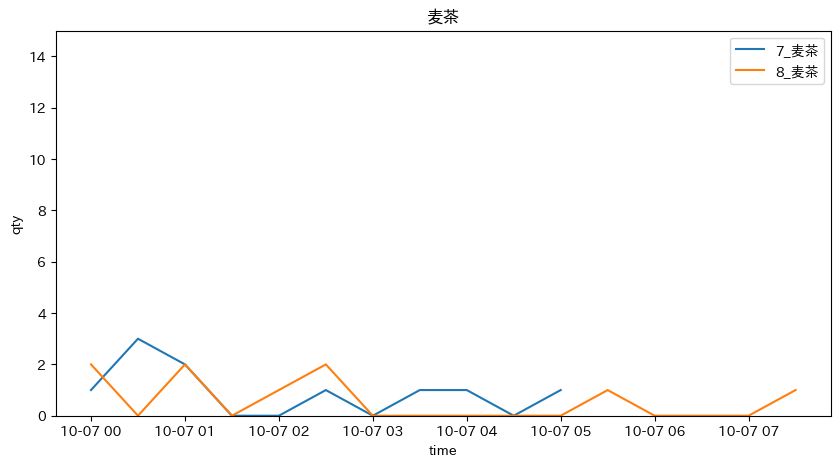

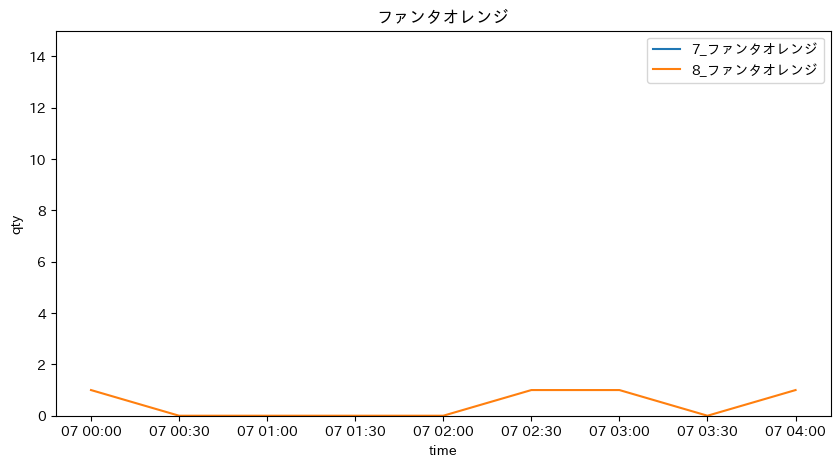

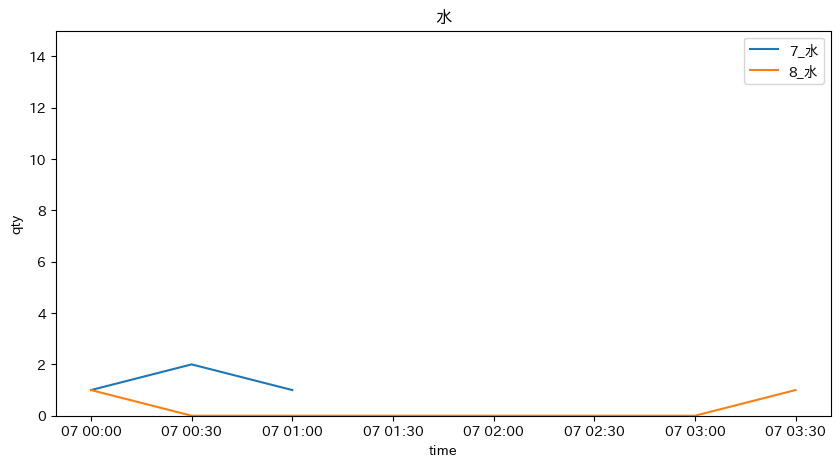

In [115]:
for order in orders_drink:
    plt.figure(figsize=(10,5))
    plt.plot(globals()["df_seven_date_pass_" + order].index, globals()["df_seven_date_pass_" + order]['qty'], label="7_"+order)
    plt.plot(globals()["df_eight_date_pass_" + order].index, globals()["df_eight_date_pass_" + order]['qty'], label="8_"+order)
    plt.title(order)
    plt.xlabel('time')
    plt.ylabel('qty')
    # 最大値を設定
    plt.ylim(0, 15)
    # plt.xlim(pd.to_datetime("2023-10-07 10:00:00"), pd.to_datetime("2023-10-07 19:00:00"))
    plt.legend()
    plt.show()